In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
dataset = pd.read_csv('D:/Documentos/Master/temariomaster/p6.DescriptiveMachineLearning/TimeSeriesAnalysis/AirPassengers.csv')
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
#Parse strings to datetime format
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [4]:
dataset

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [5]:
indexedDataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


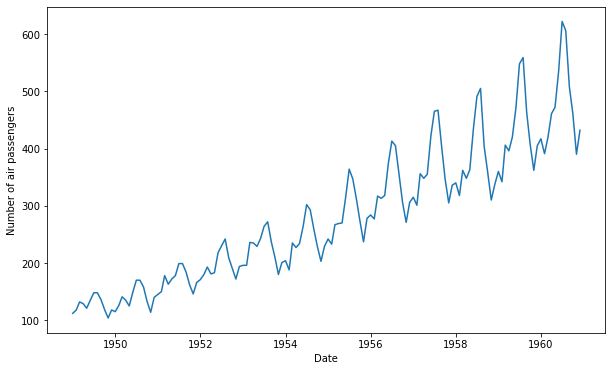

In [7]:
#Plot graphs to see the data
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

### Determining rolling statistics

We are oging to set the window to 12, that means we are going to check the pasangers over 12 month (1 year)

In [8]:
rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


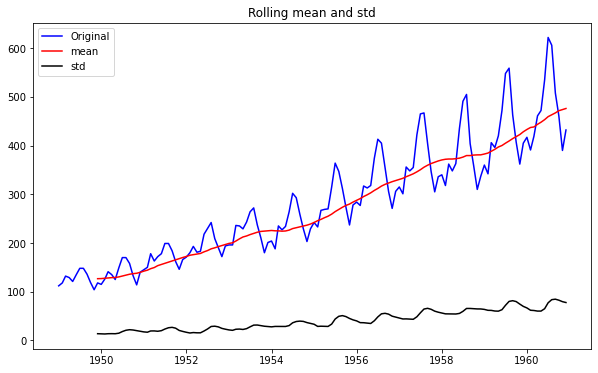

In [9]:
#Plot the statistics 
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red',label='mean')
std = plt.plot(rolstd, color='black',label='std')
plt.legend(loc='best')
plt.title('Rolling mean and std')
plt.show(block=False)

As we can see the mean and the standars deviation are not constants so that means our data is not stationary

### Perform Dickey-Fuller test:

In [10]:
from statsmodels.tsa.stattools import adfuller

print('Results od Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')

#AIC gives you the information you want about the tame series.

dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value

print(dfoutput)

Results od Dickey-Fuller Test:
Test Statistic                0.815369
p-value                       0.991880
#Lags Used                   13.000000
Number observations used    130.000000
Critical value (1%)          -3.481682
Critical value (5%)          -2.884042
Critical value (10%)         -2.578770
dtype: float64


### Estimate the trend

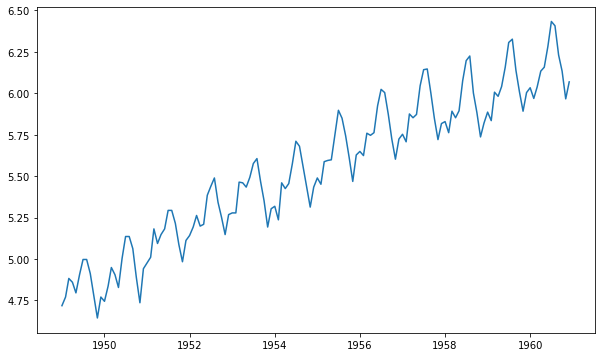

In [11]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

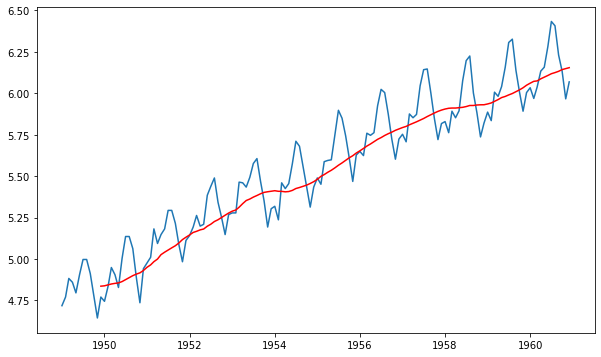

In [12]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

### Now we are going to get the diference between the moving average and the actual number of passangers

In [13]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [14]:
#Removing NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [15]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #plotting
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red',label='mean')
    std = plt.plot(movingSTD, color='black',label='std')
    plt.legend(loc='best')
    plt.title('Rolling mean and std')
    plt.show(block=False)
    
    #perfomr dickey fuller test
    print('Results od Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number observations used'])

    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value

    print(dfoutput)

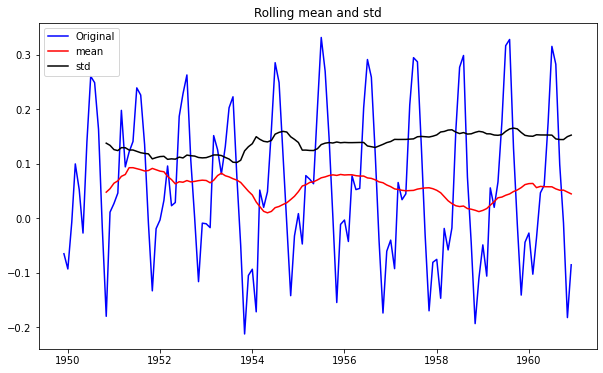

Results od Dickey-Fuller Test:
Test Statistic               -3.162908
p-value                       0.022235
#Lags Used                   13.000000
Number observations used    119.000000
Critical value (1%)          -3.486535
Critical value (5%)          -2.886151
Critical value (10%)         -2.579896
dtype: float64


In [16]:
test_stationary(datasetLogScaleMinusMovingAverage)

Now we have a much better data that what we had earlier.

#### In this case the critical values are almost the same, that determines if the data is stationary or not.

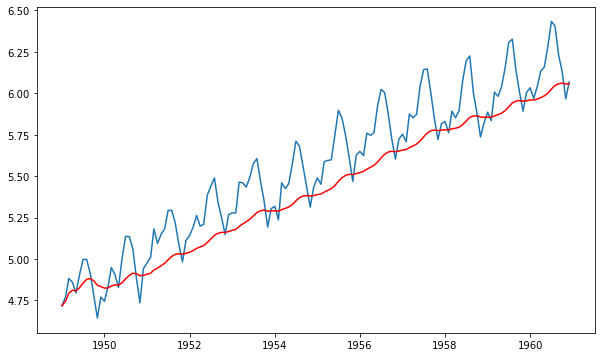

In [17]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

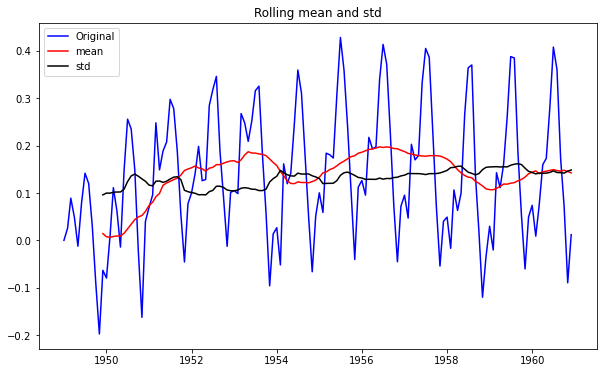

Results od Dickey-Fuller Test:
Test Statistic               -3.601262
p-value                       0.005737
#Lags Used                   13.000000
Number observations used    130.000000
Critical value (1%)          -3.481682
Critical value (5%)          -2.884042
Critical value (10%)         -2.578770
dtype: float64


In [18]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

### Now that the p-value is almost 0, we now that the data is stationary

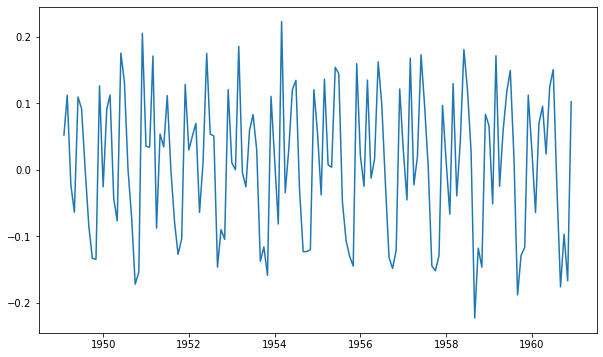

In [19]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

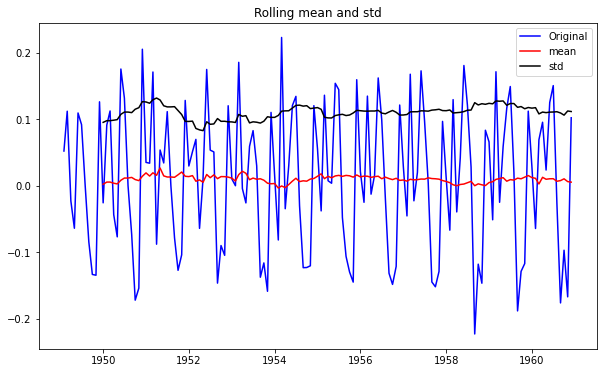

Results od Dickey-Fuller Test:
Test Statistic               -2.717131
p-value                       0.071121
#Lags Used                   14.000000
Number observations used    128.000000
Critical value (1%)          -3.482501
Critical value (5%)          -2.884398
Critical value (10%)         -2.578960
dtype: float64


In [20]:
#Drop NAN values
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

Now we are goign to decompose or timeseries in order to perfomr ARIMA

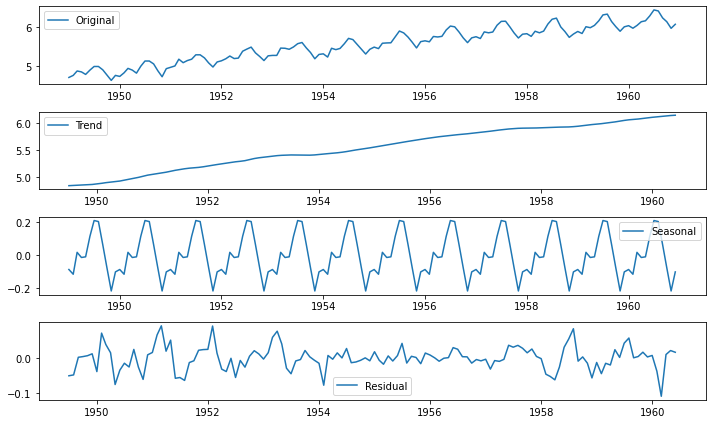

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()



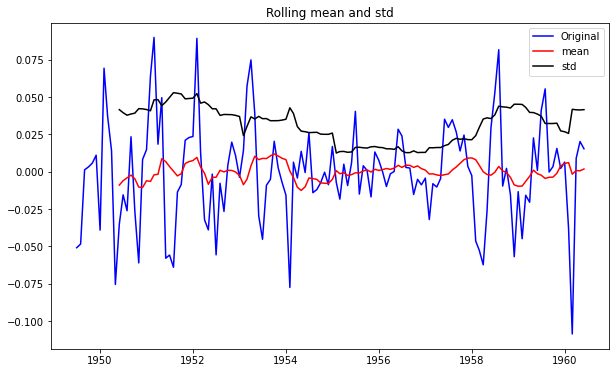

Results od Dickey-Fuller Test:


KeyError: '#Passengers'

In [22]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

## ACF and PACF plots:

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

log_acf = acf(datasetLogDiffShifting,nlags=20)
log_pacf = pacf(datasetLogDiffShifting,nlags=20, method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(log_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title("Autocorrelation function")

#plot PACF:
plt.subplot(122)
plt.plot(log_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title("Partial Autocorrelation function")

plt.tight_layout()

## ARIMA model

C:\Users\franc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\franc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

plotting AR model


C:\Users\franc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


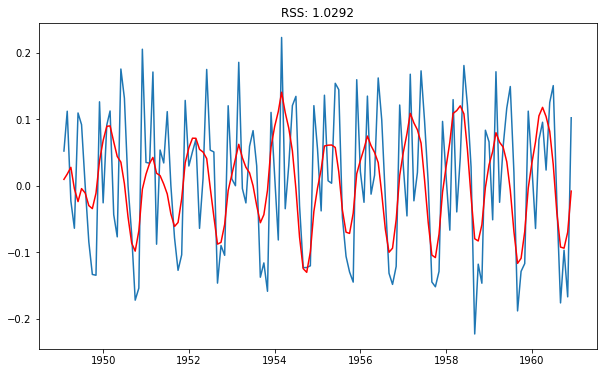

In [28]:
from statsmodels.tsa.arima_model import ARIMA

#AR model:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting["#Passengers"])**2))
print("plotting AR model")

plotting MA model


C:\Users\franc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\franc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


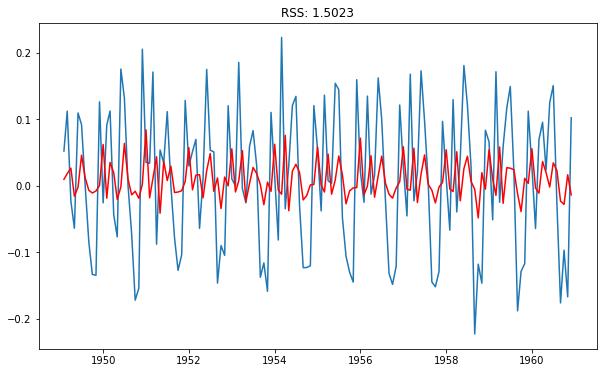

In [29]:
#MA model:
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting["#Passengers"])**2))
print("plotting MA model")

C:\Users\franc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\franc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting ARIMA model


C:\Users\franc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


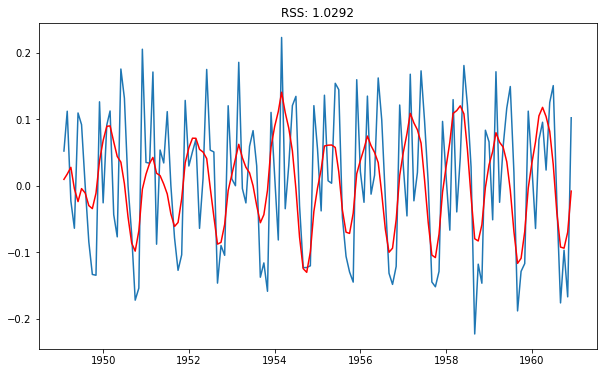

In [30]:

model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting["#Passengers"])**2))
print("plotting ARIMA model")

## Transformations

In [31]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017492
1949-04-01    0.027671
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [32]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027072
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026332
                ...   
1960-08-01    1.372568
1960-09-01    1.280218
1960-10-01    1.186205
1960-11-01    1.116281
1960-12-01    1.108153
Length: 143, dtype: float64


In [35]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

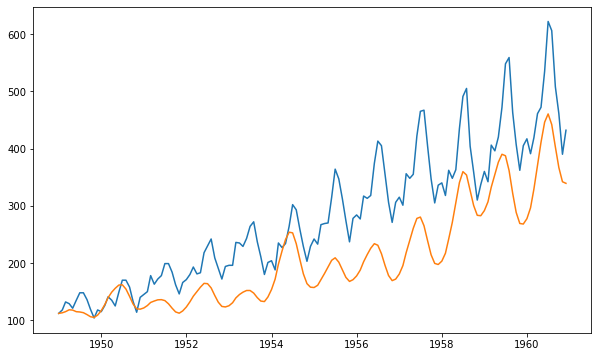

In [36]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [37]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


# Predict the results in 10 years

12 month is 1 year, so 10*12 is 120 months

144 rows + 120  years = 264

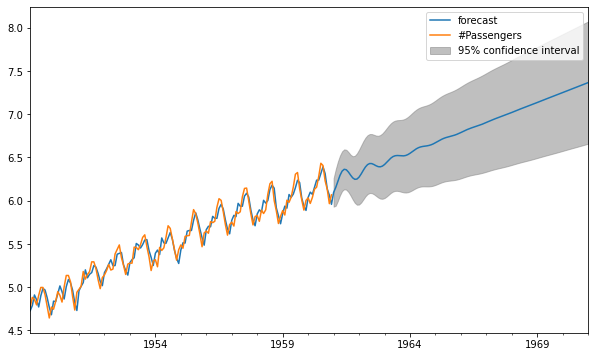

In [39]:
#resutls of the predictions in plot
results_ARIMA.plot_predict(1,264)
#results of the predictions in array
x=results_ARIMA.forecast(steps=120)

In [40]:
x[1]

array([0.0838471 , 0.1074946 , 0.11568691, 0.11702769, 0.11703491,
       0.11744014, 0.11762247, 0.1177871 , 0.1202416 , 0.12736043,
       0.13870966, 0.15118804, 0.16157827, 0.16834406, 0.17177336,
       0.17311986, 0.17358734, 0.1738546 , 0.17430216, 0.1754333 ,
       0.17788147, 0.18195725, 0.18726224, 0.19283403, 0.19769255,
       0.20130648, 0.20369061, 0.20519835, 0.20625269, 0.20720997,
       0.20836968, 0.21000323, 0.21229742, 0.21524478, 0.21860181,
       0.2219826 , 0.22503068, 0.22755296, 0.22954806, 0.23114795,
       0.2325382 , 0.23390527, 0.23541302, 0.23718304, 0.23926531,
       0.24161532, 0.24410366, 0.24656352, 0.24885251, 0.25089623,
       0.25269725, 0.25431618, 0.25584301, 0.25737215, 0.25898377,
       0.26072836, 0.26261535, 0.26461077, 0.26664886, 0.26865468,
       0.27056835, 0.27236083, 0.27403686, 0.27562757, 0.27717812,
       0.27873508, 0.28033572, 0.28199999, 0.28372663, 0.28549491,
       0.28727191, 0.28902326, 0.29072317, 0.29236062, 0.29394